In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# Functions

In [2]:
def combine_csv(filepath):
    import os
    import pandas as pd

    # Initialize an empty list to store data frames
    dfs = []

    # Iterate through each file in the directory
    for filename in os.listdir(filepath):
        if filename.endswith(".csv"):
            # Read the CSV file without header
            df = pd.read_csv(os.path.join(filepath, filename), encoding='ISO-8859-1')
            # Add column names
            # Append the DataFrame to the list
            dfs.append(df)
        elif filename.endswith(".xlsx"):
            # Read the CSV file without header
            df = pd.read_excel(os.path.join(filepath, filename))
            # Add column names
            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames in the list
    concatenated_df = pd.concat(dfs, ignore_index=True)
    
    return concatenated_df

In [3]:
def select_needed_columns(df, date_column, call_column):
    selected_columns = [date_column, call_column]
    print(df[call_column].unique())
    return df[selected_columns]
    

In [4]:
def excluded_unwanted_mvt_values(df, call_column, value_to_exclude):
    filtered_df = df[~df[call_column].str.contains(value_to_exclude, na=False, regex = True)]
    return filtered_df

In [5]:
def filter_mvt(df, call_column, mvt_name):
    # Filter the DataFrame based on the specified column and value
    filtered_df = df[df[call_column].str.contains(mvt_name, na=False, regex = True)]
    print("filtered values to represent MVT: ", filtered_df[call_column].unique())
    return filtered_df

In [6]:

def multiple_date_formats(df, date_column, possible_date_formats):
    from datetime import datetime
    
    # Get rid of +00 after seconds units  
    if ((df[date_column].dtype != ('datetime64[ns]')) and (df[date_column].dtype != ("datetime64[ns, UTC]"))):

        df[date_column] = df[date_column].str.replace('\\+\\d*', '', regex=True)
        df[date_column] = df[date_column].str.replace('  ', ' ', regex=True)
        
        for date_format in possible_date_formats:
            try:
                # Convert the date strings to datetime objects using the current format
                #pdb.set_trace()
                df[date_column] = pd.to_datetime(df[date_column], format = date_format)


                break  # If correct format, stop trying other formats
            except ValueError:
                try: 
                    df[date_column] = df[date_column].apply(lambda x : pd.to_datetime(x, format = date_format, errors = 'ignore'))
                except ValueError:
                    print("date formation error")
                    pass # If incorrect format, try the next format

    return df[date_column]


In [7]:
'''
def multiple_date_formats(df, date_column, date_format):
    from datetime import datetime
    # Get rid of +00 after seconds units
    if df[date_column].dtype != 'datetime64[ns]':
        df[date_column] = df[date_column].str.replace('\\+\\d*', '', regex=True)
        df[date_column] = df[date_column].str.replace('  ', ' ', regex=True)
        
        for 
        wrong_dates = detect_wrong_date_format(df, date_column, date_format)
        if len(wrong_dates) != 0:
            return wrong_dates
        else:
            #import pdb
            #pdb.set_trace()
            df[date_column] = pd.to_datetime(df[date_column], format = date_format)
    return pd.to_datetime(df[date_column])


def multiple_date_formats(df, date_column, possible_date_formats):
    from datetime import datetime

    new_cols = [date_column]
    # Get rid of +00 after seconds units
    if df[date_column].dtype != 'datetime64[ns]':
        df[date_column] = df[date_column].str.replace('\\+\\d*', '', regex=True)
        df[date_column] = df[date_column].str.replace('  ', ' ', regex=True)
        
        for date_format in possible_date_formats:
            df[date_format] = pd.to_datetime(df[date_column], format = date_format, errors = "coerce")
            new_cols.append(date_format)
      
        for cols in df[new_cols]:
            df[date_format] = df[date_format].fillna(df[cols])
    
    return df[date_column]
'''

'\ndef multiple_date_formats(df, date_column, date_format):\n    from datetime import datetime\n    # Get rid of +00 after seconds units\n    if df[date_column].dtype != \'datetime64[ns]\':\n        df[date_column] = df[date_column].str.replace(\'\\+\\d*\', \'\', regex=True)\n        df[date_column] = df[date_column].str.replace(\'  \', \' \', regex=True)\n        \n        for \n        wrong_dates = detect_wrong_date_format(df, date_column, date_format)\n        if len(wrong_dates) != 0:\n            return wrong_dates\n        else:\n            #import pdb\n            #pdb.set_trace()\n            df[date_column] = pd.to_datetime(df[date_column], format = date_format)\n    return pd.to_datetime(df[date_column])\n\n\ndef multiple_date_formats(df, date_column, possible_date_formats):\n    from datetime import datetime\n\n    new_cols = [date_column]\n    # Get rid of +00 after seconds units\n    if df[date_column].dtype != \'datetime64[ns]\':\n        df[date_column] = df[date_colum

In [8]:
def detect_wrong_date_format(df, date_column, date_format):
    wrong_dates = []
    for index, value in df[date_column].items():
        try:
            
            pd.to_datetime(value, format=date_format)
            break  # If correct format, stop trying other formats
        except ValueError:
            pass  # If incorrect format, try the next format
        else:
            # If none of the formats work, add the value and format to the list of wrong dates
            wrong_dates.append((value, date_format))
    return wrong_dates

In [9]:
def day_to_month_and_filter_years(df, date_column, possible_date_formats):
    # Convert the date column to datetime format
    
    df[date_column] = multiple_date_formats(df, date_column, possible_date_formats)

    filtered_df = df[(df[date_column].dt.year >= 2017) & (df[date_column].dt.year <= 2022)]
    # Convert the dates to month format
    filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')
    
    return filtered_df

In [10]:
def groupby_and_count(df, date_column, call_column, city_name):
    # Group by the date_time_column and count occurrences of each unique value in the call_type_column
    grouped_df = df.groupby(date_column).size().reset_index()
    grouped_df.columns = ["year_month", f"{city_name}_MVT_911"]
    return grouped_df

In [11]:
def remove_duplicated_calls(filepath, date_format, call_column, mvt_name, date_column, time_column, id_columns, combine_files = True):
    
    if combine_files == True:
        df = combine_csv(filepath)
    else:
        df = pd.read_csv(filepath, low_memory=False)

    df = df[~df[date_column].isna()]
    df = filter_mvt(df, call_column, mvt_name)
    df = day_to_month_and_filter_years(df, date_column, date_format)
    
    #df[date_column] = pd.to_datetime(df[date_column])

    print(df.columns)
    # Sort the DataFrame by date_time
    df = df.sort_values(by=date_column)

    # Initialize a column for potential duplicates
    df['potential_duplicate'] = False

    # subset wanted columns
    subset_column_list = df.columns.tolist()
    
    # Columns to remove
    columns_to_remove = id_columns
    columns_to_remove.append(time_column)

    # Remove columns using list comprehension
    subset_column_list = [col for col in subset_column_list if col not in columns_to_remove]

    duplicated_df = df[df.duplicated(subset=subset_column_list, keep=False)]
    duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
    # Calculate the time difference in minutes between consecutive calls
    duplicated_df['time_diff'] = duplicated_df[time_column].diff().dt.total_seconds() / 60
    
    # Mark potential duplicates based on 5-minute intervals
    duplicated_df['duplicated_and_less_than_xx_minutes'] = (duplicated_df['time_diff'] <= 60)
    
    subset_column_list.append('duplicated_and_less_than_xx_minutes')
    print(subset_column_list)
    # filter out true duplicated ones, where they are duplicated in columns other than
    # date and id numbers, and duplicated within xx minutes, keep the first duplicated ones
    duplicated_df['unique_case_filtered_after_duplication'] = duplicated_df.duplicated(subset=subset_column_list, keep='first')
    # Filter out duplicates
    # Filter out the true duplicates from the original DataFrame
    filtered_df = df[~df.index.isin(duplicated_df.index)]
    
    unique_cases_to_add_back = duplicated_df[duplicated_df['unique_case_filtered_after_duplication']]

    # Append these unique cases to the filtered DataFrame
    final_df = pd.concat([filtered_df, unique_cases_to_add_back])

    # Drop the helper columns from the final filtered DataFrame if needed
    final_df = final_df.drop(columns=['time_diff', 'potential_duplicate', 'true_duplicate'], errors='ignore')

    percentage_of_duplicated = (len(df) - len(final_df))/len(df)*100
    
    raw_calls_number = len(df)
    
    duplicated_calls = len(df) - len(final_df)
    
    return final_df, percentage_of_duplicated, raw_calls_number, duplicated_calls

In [12]:
def do_it_all_at_once(filepath, city_name, date_column, time_column, date_format, call_column, mvt_name, id_columns, 
                      combine_files = True, value_to_exclude = np.nan):
    df, percentage_of_duplicated, raw_calls_number, duplicated_calls = remove_duplicated_calls(filepath, 
                                                                                               date_format, 
                                                                                               call_column, 
                                                                                               mvt_name,
                                                                                               date_column, 
                                                                                               time_column,
                                                                                               id_columns, 
                                                                                               combine_files)
    
    # kwargs is for the values we want to exclude, for example, for the value of "stolen vehicle supplememts", we want  
    # to exclude "supplement"
    
    try:
        df = excluded_unwanted_mvt_values(df, call_column, value_to_exclude)
    except TypeError:
        print("No mvt value to exclude")
        pass
    #import pdb
    #pdb.set_trace()
    df = select_needed_columns(df, date_column, call_column)
    
    
    df = groupby_and_count(df, date_column, call_column, city_name)
    df.to_csv(f"{city_name}_911_by_month.csv")
    visual_data(df, city_name)
    print("Percentage of duplicated calls: ", percentage_of_duplicated, "\n", "Total Raw Call Counts: ", raw_calls_number, 
          "\n", "Total Duplicated Call Counts: ", duplicated_calls)
    return df, percentage_of_duplicated, raw_calls_number, duplicated_calls
    

In [13]:
def do_it_all_at_once_without_coumbining_csv(filepath, city_name, date_column, date_format, call_column, mvt_name, value_to_exclude = np.nan):
    df = pd.read_csv(filepath, low_memory=False)
    #filter out data without date information

    df = df[~df[date_column].isna()]
    # kwargs is for the values we want to exclude, for example, for the value of "stolen vehicle supplememts", we want  
    # to exclude "supplement"
    try:
        df = excluded_unwanted_mvt_values(df, call_column, value_to_exclude)
    except TypeError:
        print("No mvt value to exclude")
        pass
    df = select_needed_columns(df, date_column, call_column)
    df = filter_mvt(df, call_column, mvt_name)
    
    df = groupby_and_count(df, date_column, call_column, city_name)
    df.to_csv(f"{city_name}_911_by_month.csv")
    visual_data(df, city_name)
    return df

# Date Formats

In [14]:
'''
time formats

24 hrs system

"%m/%d/%Y %H:%M:%S"
"%Y-%m-%d %H:%M:%S"
"%m/%d/%Y"
"%m/%d/%Y %H:%M"
"%Y/%m/%d %H:%M:%S"

12 hrs system

"%m/%d/%Y %I:%M:%S %p"

'''

'\ntime formats\n\n24 hrs system\n\n"%m/%d/%Y %H:%M:%S"\n"%Y-%m-%d %H:%M:%S"\n"%m/%d/%Y"\n"%m/%d/%Y %H:%M"\n"%Y/%m/%d %H:%M:%S"\n\n12 hrs system\n\n"%m/%d/%Y %I:%M:%S %p"\n\n'

# Aggregate Separate Files

In [15]:
def visual_data(df, city_name):
    import matplotlib.pyplot as plt
    from matplotlib.dates import MonthLocator, DateFormatter
    import pandas as pd
    df['year_month'] = pd.to_datetime(df['year_month'])
    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the data
    ax.plot(df['year_month'], df[f"{city_name}_MVT_911"], marker='o', linestyle='-')

    # Set labels and title
    ax.set_xlabel('Year-Month')
    ax.set_ylabel(f'{city_name} MVT 911 Count')
    ax.set_title(f'{city_name} MVT 911 Count Over Time')
    
    # Set date format for x-axis
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    
    # Set x-axis limits to exclude empty months before and after real data
    min_date = min(df['year_month'])
    max_date = max(df['year_month'])
    ax.set_xlim(min_date, max_date)
    
    # Decrease font size of x-axis labels
    ax.tick_params(axis = 'x', labelsize = 7)  # Adjust fontsize here

    # Rotate x-axis labels for better readability
    plt.xticks(rotation = 80)

    # Show grid
    ax.grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()

C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2225536609.py:12: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(filepath, filename), encoding='ISO-8859-1')
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2225536609.py:12: DtypeWarning: Columns (7,9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(filepath, filename), encoding='ISO-8859-1')


filtered values to represent MVT:  ['10851R' '10851RR' '10851' '10851E' 'AU10851' '10851rr']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')


Index(['incident_num', 'date_time', 'day_of_week', 'address_number_primary',
       'address_dir_primary', 'address_road_primary', 'address_sfx_primary',
       'address_dir_intersecting', 'address_road_intersecting',
       'address_sfx_intersecting', 'call_type', 'disposition', 'beat',
       'priority'],
      dtype='object')


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['time_diff'] = duplicated_df[time_column].diff().dt.total_seconds() / 60
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:37: SettingWithCopyWarning: 
A value is trying to be set on a

['day_of_week', 'address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition', 'beat', 'priority', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['10851R' '10851E' '10851RR' '10851' 'AU10851' '10851rr']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\347843945.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  grouped_df = df.groupby(date_column).size().reset_index()


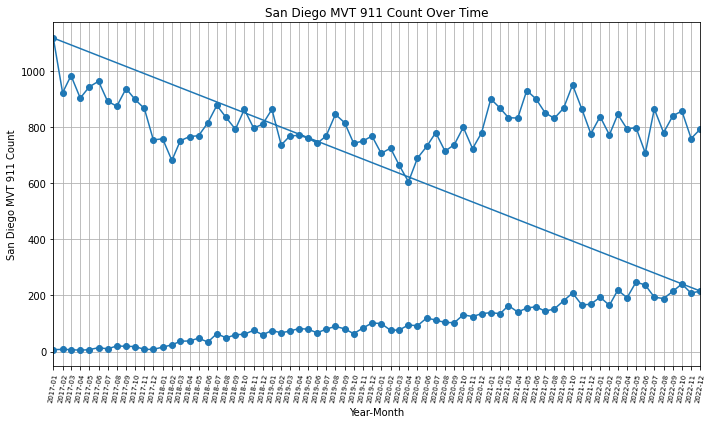

Percentage of duplicated calls:  6.040612753829711 
 Total Raw Call Counts:  70175 
 Total Duplicated Call Counts:  4239


In [70]:
sd_911, sd_percentage_of_duplicated, sd_raw_calls_number, sd_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\San Diego PD", 
    "San Diego", "date_time", "date_time", ["%Y-%m-%d %H:%M:%S"], "call_type", "10851", ["incident_num"], True)

filtered values to represent MVT:  ['Stolen Vehicle']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')


Index(['CallNumber', 'ReportMonthYear', 'ReportDateTime', 'TimeInQueue_sec',
       'TravelTime_sec', 'ResponseTime_sec', 'Priority', 'PriorityNumber',
       'FinalCallGroup', 'FinalCallCategory', 'Neighborhood', 'Address',
       'OpenDataX', 'OpenDataY', 'OpenDataLon', 'OpenDataLat'],
      dtype='object')
['ReportMonthYear', 'TimeInQueue_sec', 'TravelTime_sec', 'ResponseTime_sec', 'Priority', 'PriorityNumber', 'FinalCallGroup', 'FinalCallCategory', 'Neighborhood', 'Address', 'OpenDataX', 'OpenDataY', 'OpenDataLon', 'OpenDataLat', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['Stolen Vehicle']


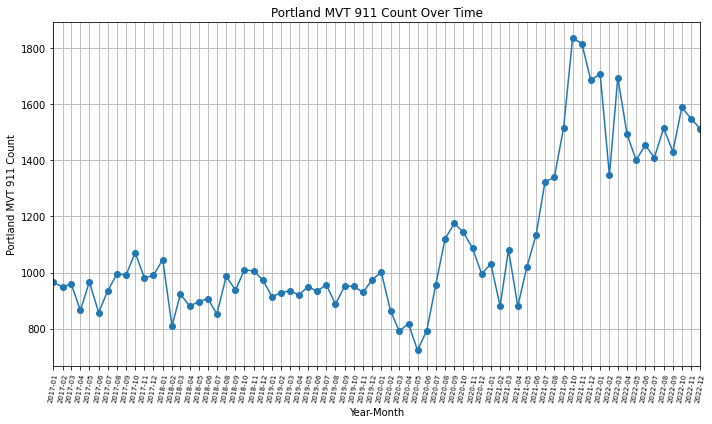

Percentage of duplicated calls:  0.0 
 Total Raw Call Counts:  79089 
 Total Duplicated Call Counts:  0


In [17]:
portland_911, portland_percentage_of_duplicated, portland_raw_calls_number, portland_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Portland PD", 
    "Portland", "ReportMonthYear", "ReportDateTime", ["%m/%d/%Y"], "FinalCallCategory", "Stolen Vehicle", ["CallNumber"], True)


In [18]:
#philadelphia_911 = do_it_all_at_once(
    #r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Crime Incident Data\Philadelphia_PD", 
    #"Philadelphia","dispatch_date_time", "dispatch_date_time", ["%Y-%m-%d %I:%M:%S"], "text_general_code", "Motor Vehicle Theft", ["objectid"], True)

C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2225536609.py:12: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(filepath, filename), encoding='ISO-8859-1')


filtered values to represent MVT:  ['AUTO THEFT' 'SIMULTANEOS STOLEN/RECOVERY VEHICLE' 'VEHICLE STOLEN']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Index(['NOPD_Item', 'Type_', 'TypeText', 'Priority', 'MapX', 'MapY',
       'TimeCreate', 'TimeDispatch', 'TimeArrive', 'TimeClosed', 'Disposition',
       'DispositionText', 'BLOCK_ADDRESS', 'Zip', 'PoliceDistrict', 'Location',
       'InitialType', 'InitialTypeText', 'InitialPriority', 'SelfInitiated',
       'Beat', 'Type', 'TimeArrival'],
      dtype='object')
['Type_', 'TypeText', 'Priority', 'MapX', 'MapY', 'TimeDispatch', 'TimeArrive', 'TimeClosed', 'Disposition', 'DispositionText', 'BLOCK_ADDRESS', 'Zip', 'PoliceDistrict', 'Location', 'InitialType', 'InitialTypeText', 'InitialPriority', 'SelfInitiated', 'Beat', 'Type', 'TimeArrival', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['AUTO THEFT' 'SIMULTANEOS STOLEN/RECOVERY VEHICLE' 'VEHICLE STOLEN']


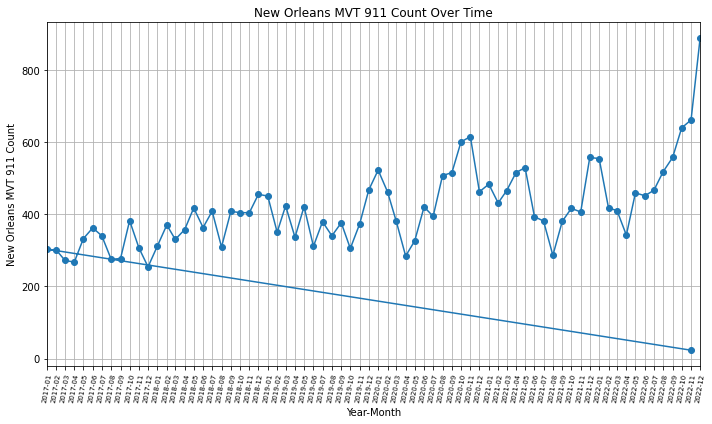

Percentage of duplicated calls:  0.006699269779594024 
 Total Raw Call Counts:  29854 
 Total Duplicated Call Counts:  2


In [19]:
new_orleans_911, new_orleans_percentage_of_duplicated, new_orleans_raw_calls_number, new_orleans_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\New Orleans PD", 
    "New Orleans","TimeCreate", "TimeCreate", ["%m/%d/%Y %I:%M:%S %p"], "TypeText", 
    "AUTO THEFT|VEHICLE STOLEN|SIMULTANEOS STOLEN", ["NOPD_Item"], True)

filtered values to represent MVT:  ['5033' '5035' '503T3S' '5033S' '5033J' '5036' '50321' '5034SN' '5034SL'
 '503P1' '503P3J' '5033SN' '5033SL' '5031' '503P3' '5031I' '503P3S'
 '5033I' '503P2' '5034' '503P4S' '503P5' '503T3J' '5032' '503T3' '503H3'
 '503P21' '503PT3' '5034S' '503O3' '5033X' '503A3' '503A3S' '5034X'
 '503PT4' '503OP3' '503HT3' '503' '503OT3' '503HP3' '503T4S' '503HP4'
 '503H4' '503OP4']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Index(['Incident Number', 'Reporting District', 'Area Occurred',
       'Dispatch Date', 'Dispatch Time', 'Call Type Code',
       'Call Type Description', 'Incident_Number', 'Area_Occ', 'Rpt_Dist',
       'Dispatch_Date', 'Dispatch_Time', 'Call_Type_Code', 'Call_Type_Text'],
      dtype='object')
['Incident Number', 'Reporting District', 'Area Occurred', 'Dispatch Date', 'Dispatch Time', 'Call Type Code', 'Call Type Description', 'Area_Occ', 'Rpt_Dist', 'Call_Type_Code', 'Call_Type_Text', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['unique_case_filtered_after_duplication'] = duplicated_df.duplicated(subset=subset_column_list, keep='first')


No mvt value to exclude
['503P2' '503P3' '5035' '503P3S' '5033S' '5036' '503T3S' '503O3' '5032'
 '5033' '5034S' '5034' '50321' '5033J' '503P5' '5034SN' '503P21' '503P1'
 '503P4S' '503T3' '5033X' '5033SN' '503P3J' '5031' '5031I' '503H3'
 '503T3J' '5033I' '5033SL' '503PT3' '503A3' '5034SL' '503A3S' '5034X'
 '503PT4' '503OP3' '503HT3' '503OT3' '503' '503T4S' '503HP3' '503HP4'
 '503H4' '503OP4']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\347843945.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  grouped_df = df.groupby(date_column).size().reset_index()


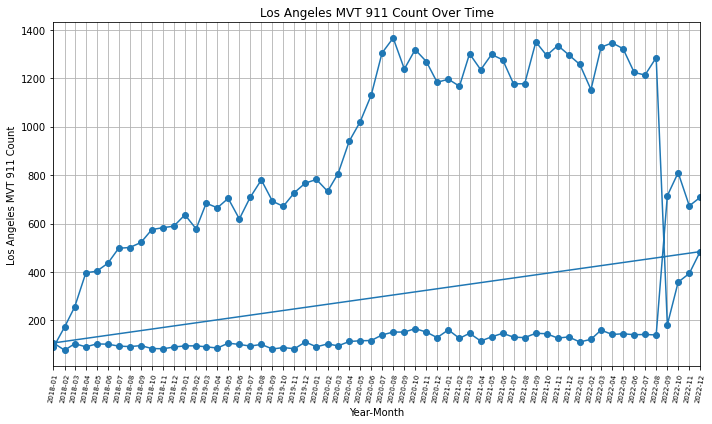

Percentage of duplicated calls:  15.59368788284451 
 Total Raw Call Counts:  73953 
 Total Duplicated Call Counts:  11532


In [20]:
los_angeles_911, la_percentage_of_duplicated, la_raw_calls_number, la_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\LAPD", 
    "Los Angeles", "Dispatch_Date", "Dispatch_Date", ["%m/%d/%Y", "%m/%d/%Y %I:%M:%S %p"], "Call_Type_Code", "503", ["Incident_Number", "Dispatch_Time"], True)

In [21]:
#denver_crime = do_it_all_at_once(r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Denver_crime_2021", 
                           #"Denver",
                          #"first_occurrence_date", ["%m/%d/%Y %I:%M:%S %p"], "offense_category_id", "auto-theft")

In [22]:
#boston_crime = do_it_all_at_once(r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Boston_PD", 
                           #"Boston",
                          #"OCCURRED_ON_DATE", ["%Y-%m-%d %H:%M:%S"], "OFFENSE_DESCRIPTION", "AUTO THEFT")

In [23]:
#Atlanda
#atlanta1 = pd.read_csv(r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Atlanta_crime_2017_2020\Atlanta_2017_2020_mvt.csv")
#atlanta2 = pd.read_csv(r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Atlanta_crime_2017_2020\Atlanta_2021_2024_mvt.csv")
#atlanta1 = atlanta1[['Occur Date', 'Crime Type']]
#atlanta2 = atlanta2[['Offense Start Date', 'NIBRS Code Name']]
#atlanta1.columns = ['Offense Start Date', 'NIBRS Code Name']

# concate
# Initialize an empty list to store data frames
#at_dfs = []
#at_dfs.append(atlanta1)
#at_dfs.append(atlanta2)
#at_concatenated_df = pd.concat(at_dfs, ignore_index=True)

#groupby
#at_concatenated_df = day_to_month_and_filter_years(at_concatenated_df, 'Offense Start Date', ["%m/%d/%Y %I:%M:%S %p", "%m/%d/%Y"])
#at_concatenated_df = groupby_and_count(at_concatenated_df, 'Offense Start Date', 'NIBRS Code Name', "Atlanta")
#at_concatenated_df.to_csv("Atlanta_911_by_month.csv")
#visual_data(at_concatenated_df, "Atlanta")


# Aggregate Single Files

filtered values to represent MVT:  ['STOLEN VEHICLE']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')


Index(['cad_number', 'dup_cad_number', 'pd_incident_report',
       'received_datetime', 'entry_datetime', 'dispatch_datetime',
       'enroute_datetime', 'onscene_datetime', 'close_datetime',
       'call_type_original', 'call_type_original_desc',
       'call_type_original_notes', 'call_type_final', 'call_type_final_desc',
       'call_type_final_notes', 'priority_original', 'priority_final',
       'agency', 'disposition', 'onview_flag', 'sensitive_call',
       'intersection_name', 'intersection_id', 'intersection_point',
       'supervisor_district', 'analysis_neighborhood', 'police_district',
       'data_as_of', 'data_updated_at', 'data_loaded_at', 'source_filename',
       'Neighborhoods', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods'],
      dtype='object')


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['time_diff'] = duplicated_df[time_column].diff().dt.total_seconds() / 60
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:37: SettingWithCopyWarning: 
A value is trying to be set on a

['call_type_original', 'call_type_original_desc', 'call_type_original_notes', 'call_type_final', 'call_type_final_desc', 'call_type_final_notes', 'priority_original', 'priority_final', 'agency', 'disposition', 'onview_flag', 'sensitive_call', 'intersection_name', 'intersection_id', 'intersection_point', 'supervisor_district', 'analysis_neighborhood', 'police_district', 'data_as_of', 'data_updated_at', 'data_loaded_at', 'source_filename', 'Neighborhoods', 'SF Find Neighborhoods', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['STOLEN VEHICLE']


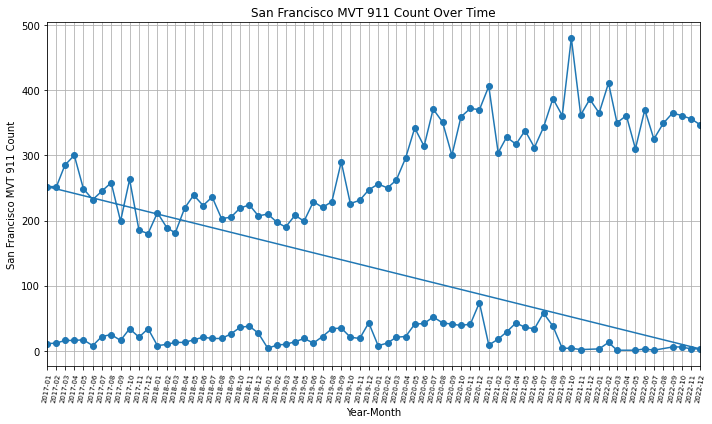

Percentage of duplicated calls:  4.314985240493141 
 Total Raw Call Counts:  23036 
 Total Duplicated Call Counts:  994


In [24]:
san_francisco_911, sf_percentage_of_duplicated, sf_raw_calls_number, sf_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\SFPD_cfs.csv", 
    "San Francisco", "received_datetime", "received_datetime", ["%m/%d/%Y %I:%M:%S %p"], 
    "call_type_final_desc", "STOLEN VEHICLE", 
    ['cad_number', 'dup_cad_number', 'pd_incident_report','entry_datetime', 'dispatch_datetime',
       'enroute_datetime', 'onscene_datetime', 'close_datetime'], combine_files = False)

filtered values to represent MVT:  ['--AUTOMOBILES - AUTO THEFT' '--AUTOMOBILES - AUTO THEFT & RECOVERY'
 'AUTO THEFT - VEH THEFT OR THEFT & RECOVERY'
 'AUTO THEFT-IP/JO - VEHICLE, PLATES, TABS']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Index(['CAD Event Number', 'Event Clearance Description', 'Call Type',
       'Priority', 'Initial Call Type', 'Final Call Type',
       'Original Time Queued', 'Arrived Time', 'Precinct', 'Sector', 'Beat',
       'Blurred_Longitude', 'Blurred_Latitude'],
      dtype='object')
['Event Clearance Description', 'Call Type', 'Priority', 'Initial Call Type', 'Final Call Type', 'Precinct', 'Sector', 'Beat', 'Blurred_Longitude', 'Blurred_Latitude', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['--AUTOMOBILES - AUTO THEFT' '--AUTOMOBILES - AUTO THEFT & RECOVERY'
 'AUTO THEFT - VEH THEFT OR THEFT & RECOVERY'
 'AUTO THEFT-IP/JO - VEHICLE, PLATES, TABS']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\347843945.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  grouped_df = df.groupby(date_column).size().reset_index()


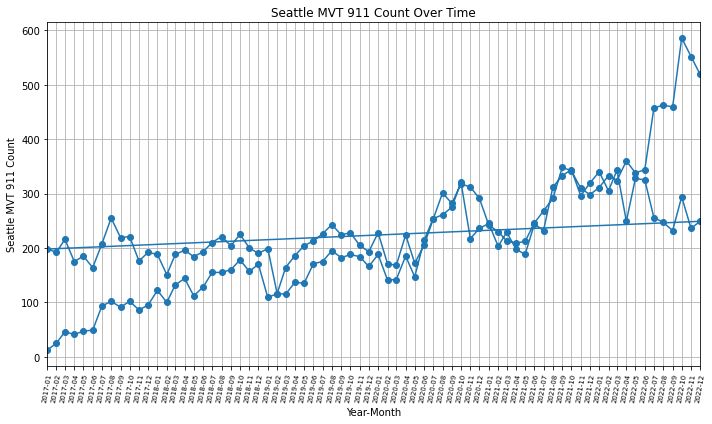

Percentage of duplicated calls:  13.959836752344659 
 Total Raw Call Counts:  36999 
 Total Duplicated Call Counts:  5165


In [25]:
seattle_911, seattle_911_percentage_of_duplicated, seattle_911_raw_calls_number, seattle_911_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Seattle_cfs.csv", 
    "Seattle", "Original Time Queued", "Original Time Queued", ["%m/%d/%Y %I:%M:%S %p"], 
    "Final Call Type", "AUTO THEFT", ['CAD Event Number', 'Arrived Time'], False)

filtered values to represent MVT:  ['Theft of Vehicle' 'Theft of Vehicle In Progress']
Index(['INCIDENT NUMBER', 'CATEGORY', 'PROBLEM TYPE', 'RESPONSE DATE',
       'ADDRESS', 'HOA', 'SCHOOL DISTRICT', 'COUNCIL DISTRICT', 'ZIPCODE'],
      dtype='object')
['CATEGORY', 'PROBLEM TYPE', 'ADDRESS', 'HOA', 'SCHOOL DISTRICT', 'COUNCIL DISTRICT', 'ZIPCODE', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['time_diff'] = duplicated_df[time_column].diff().dt.total_seconds() / 60
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:37: SettingWithCopyWarning: 
A value is trying to be set on a

No mvt value to exclude
['Theft of Vehicle' 'Theft of Vehicle In Progress']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\347843945.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  grouped_df = df.groupby(date_column).size().reset_index()


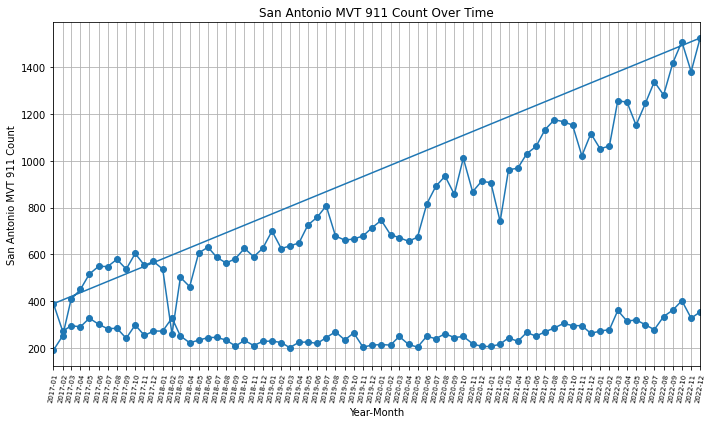

Percentage of duplicated calls:  13.328394396551724 
 Total Raw Call Counts:  89088 
 Total Duplicated Call Counts:  11874


In [26]:
san_antonio_911, san_antonio_911_percentage_of_duplicated, san_antonio_911_raw_calls_number, san_antonio_911_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\san_antonio_cfs.csv", 
    "San Antonio", "RESPONSE DATE",  "RESPONSE DATE", ["%m/%d/%Y %I:%M:%S %p"], "PROBLEM TYPE", "Theft of Vehicle",
    ["INCIDENT NUMBER"], False)

filtered values to represent MVT:  ['STOLEN VEHICLE' 'STOLEN VEHICLE ATTEMPT' 'STOLEN VEHICLE SUPPLEMENT'
 'STOLEN VEHICLE ATTEMPT SUPPLEMENT']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Index(['INCIDENT_NUM', 'DISP_CODE', 'DISPOSITION', 'FINAL_RADIO_CODE',
       'FINAL_CALL_TYPE', 'CALL_RECEIVED', 'HUNDREDBLOCKADDR', 'GRID'],
      dtype='object')
['DISP_CODE', 'DISPOSITION', 'FINAL_RADIO_CODE', 'FINAL_CALL_TYPE', 'HUNDREDBLOCKADDR', 'GRID', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
['STOLEN VEHICLE ATTEMPT' 'STOLEN VEHICLE']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\347843945.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  grouped_df = df.groupby(date_column).size().reset_index()


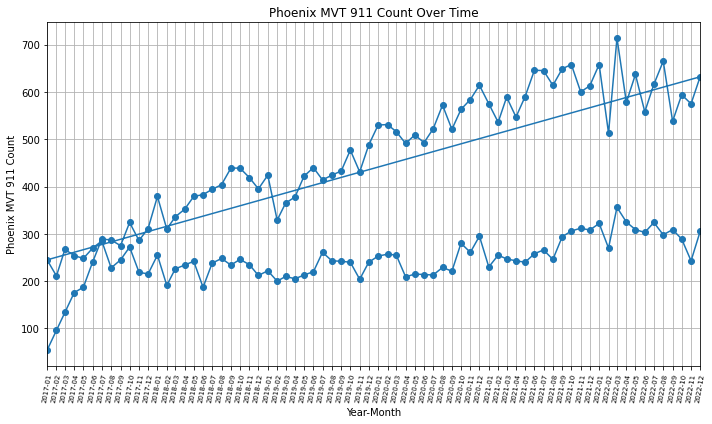

Percentage of duplicated calls:  15.777838760824492 
 Total Raw Call Counts:  65592 
 Total Duplicated Call Counts:  10349


In [27]:
phoenix_911, phoenix_911_percentage_of_duplicated, phoenix_911_raw_calls_number, phoenix_911_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Phoenix_cfs.csv", 
    "Phoenix", "CALL_RECEIVED", "CALL_RECEIVED", ["%m/%d/%Y %I:%M:%S%p"], "FINAL_CALL_TYPE", "STOLEN VEHICLE", 
    ["INCIDENT_NUM"], False, value_to_exclude = "SUPPLEMENT")

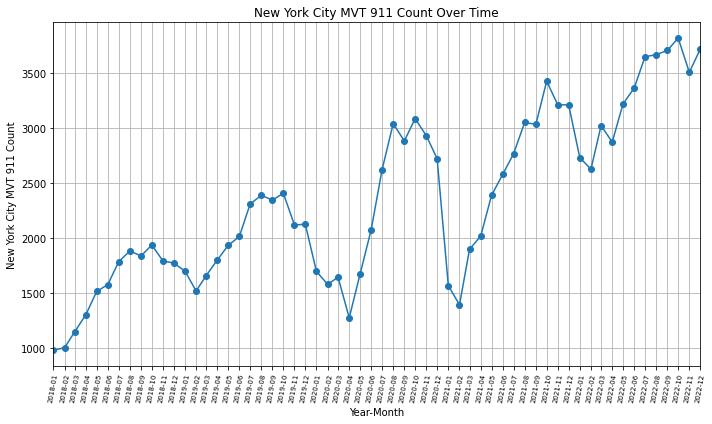

In [28]:
# new york city data is over 30 gb, it needs to be processed by local machine with spyder. please see other files
new_york_911 = pd.read_csv("New York City_911_by_month.csv")
visual_data(new_york_911, "New York City")

In [29]:
def nash_remove_duplicated_calls(df, date_column, time_column, id_columns):
    
    df = df[~df[date_column].isna()]

   
    df[date_column] = pd.to_datetime(df[date_column])
    print(df.columns)
    # Sort the DataFrame by date_time
    df = df.sort_values(by=date_column)
    
    df = df[(df.Tencode_Description.str.contains("THEFT", na=False)) & (df.Tencode_Suffix.str.contains("PV|RV", na=False))]
    print(df.shape)
    
    df = filter_mvt(df, "Tencode_Description", "THEFT")
    df[date_column] = pd.to_datetime(df[date_column])
    df = df[(df[date_column].dt.year >= 2017) & (df[date_column].dt.year <= 2022)]

    # Initialize a column for potential duplicates
    df['potential_duplicate'] = False

    # subset wanted columns
    subset_column_list = df.columns.tolist()
    
    # Columns to remove
    columns_to_remove = id_columns
    columns_to_remove.append(time_column)

    # Remove columns using list comprehension
    subset_column_list = [col for col in subset_column_list if col not in columns_to_remove]

    duplicated_df = df[df.duplicated(subset=subset_column_list, keep=False)]

    # Calculate the time difference in minutes between consecutive calls
    duplicated_df['time_diff'] = duplicated_df[time_column].diff().dt.total_seconds() / 60
    
    # Mark potential duplicates based on 5-minute intervals
    duplicated_df['duplicated_and_less_than_xx_minutes'] = (duplicated_df['time_diff'] <= 60)
    
    subset_column_list.append('duplicated_and_less_than_xx_minutes')
    print(subset_column_list)
    # filter out true duplicated ones, where they are duplicated in columns other than
    # date and id numbers, and duplicated within xx minutes, keep the first duplicated ones
    duplicated_df['unique_case_filtered_after_duplication'] = duplicated_df.duplicated(subset=subset_column_list, keep='first')
    # Filter out duplicates
    # Filter out the true duplicates from the original DataFrame
    filtered_df = df[~df.index.isin(duplicated_df.index)]
    
    unique_cases_to_add_back = duplicated_df[duplicated_df['unique_case_filtered_after_duplication']]

    # Append these unique cases to the filtered DataFrame
    final_df = pd.concat([filtered_df, unique_cases_to_add_back])

    # Drop the helper columns from the final filtered DataFrame if needed
    final_df = final_df.drop(columns=['time_diff', 'potential_duplicate', 'true_duplicate'], errors='ignore')

    percentage_of_duplicated = (len(df) - len(final_df))/len(df)*100
    
    raw_calls_number = len(df)
    
    duplicated_calls = len(df) - len(final_df)
    
    
    
    return final_df, percentage_of_duplicated, raw_calls_number, duplicated_calls

C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\453685686.py:1: DtypeWarning: Columns (12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_nash_911 = pd.read_csv(r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Nashville_cfs.csv")


Index(['X', 'Y', 'OBJECTID', 'Event_Number', 'Complaint_Number', 'Tencode',
       'Tencode_Description', 'Tencode_Suffix', 'Tencode_Suffix_Description',
       'Disposition_Code', 'Disposition_Description', 'Block', 'Street_Name',
       'Unit_Dispatched', 'Shift', 'Sector', 'Mapped_Location', 'POINT_X',
       'POINT_Y', 'ZONE_', 'Latitude', 'Longitude', 'RPA', 'Call_Received'],
      dtype='object')
(42419, 24)
filtered values to represent MVT:  ['THEFT']
['X', 'Y', 'OBJECTID', 'Complaint_Number', 'Tencode', 'Tencode_Description', 'Tencode_Suffix', 'Tencode_Suffix_Description', 'Disposition_Code', 'Disposition_Description', 'Block', 'Street_Name', 'Unit_Dispatched', 'Shift', 'Sector', 'Mapped_Location', 'POINT_X', 'POINT_Y', 'ZONE_', 'Latitude', 'Longitude', 'RPA', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
Percentage of duplicated calls:  0.0 
 Total Raw Call Counts:  33863 
 Total Duplicated Call Counts:  0
['THEFT']


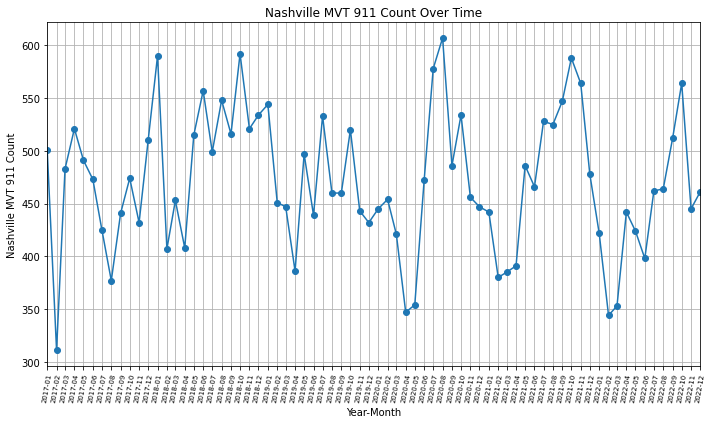

Percentage of duplicated calls:  0.0 
 Total Raw Call Counts:  33863 
 Total Duplicated Call Counts:  0


'\n\nAfter discovering a lack of clear identification for motor vehicle theft, \nI conducted further research to find helpful information. \nI came across a radio code chart for the Metropolitan Nashville Police Department online at \nhttp://www.serenadedesign.com/mack/metro.htm. \nAccording to this chart, "50" is designated for theft, with no specific code for motor vehicle theft, \nconsistent with the data I obtained. \n\nOn March 8th at 9:40, I contacted the Metropolitan Nashville Police Department (615-862-8600, \nthe number is obtained from here https://www.nashville.gov/departments/police for non-emergency purpose) \nto speak with their dispatch center\'s supervisor.\n\nThe supervisor explained that they use "50" to denote theft and employ "RV/PV/TV" to encompass any theft related to vehicles. \n"R" signifies reported, "P" denotes progressing, "T" indicates breaking into, and "V" represents vehicle. \n\n\nI opted not to include "TV" and instead utilized "RV" and "PV" in my data a

In [30]:
temp_nash_911 = pd.read_csv(r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Nashville_cfs.csv")

temp_nash_911, nash_911_percentage_of_duplicated, nash_911_raw_calls_number, nash_911_duplicated_calls = nash_remove_duplicated_calls(
    temp_nash_911, "Call_Received", "Call_Received", ["Event_Number"])

print("Percentage of duplicated calls: ",  nash_911_percentage_of_duplicated, "\n", 
      "Total Raw Call Counts: ", nash_911_raw_calls_number, 
      "\n", "Total Duplicated Call Counts: ", nash_911_duplicated_calls)

temp_nash_911 = select_needed_columns(temp_nash_911, "Call_Received", "Tencode_Description")
temp_nash_911["Call_Received"] = temp_nash_911["Call_Received"].dt.strftime('%Y-%m')
nashville_911 = groupby_and_count(temp_nash_911, "Call_Received", "Tencode_Description", "Nashville")
nashville_911.to_csv("Nashville_911_by_month.csv")
visual_data(nashville_911, "Nashville")
print("Percentage of duplicated calls: ", nash_911_percentage_of_duplicated, "\n", 
      "Total Raw Call Counts: ", nash_911_raw_calls_number, "\n", 
      "Total Duplicated Call Counts: ", nash_911_duplicated_calls)

'''

After discovering a lack of clear identification for motor vehicle theft, 
I conducted further research to find helpful information. 
I came across a radio code chart for the Metropolitan Nashville Police Department online at 
http://www.serenadedesign.com/mack/metro.htm. 
According to this chart, "50" is designated for theft, with no specific code for motor vehicle theft, 
consistent with the data I obtained. 

On March 8th at 9:40, I contacted the Metropolitan Nashville Police Department (615-862-8600, 
the number is obtained from here https://www.nashville.gov/departments/police for non-emergency purpose) 
to speak with their dispatch center's supervisor.

The supervisor explained that they use "50" to denote theft and employ "RV/PV/TV" to encompass any theft related to vehicles. 
"R" signifies reported, "P" denotes progressing, "T" indicates breaking into, and "V" represents vehicle. 


I opted not to include "TV" and instead utilized "RV" and "PV" in my data analysis. 
This decision was made because there is no clear indication of how "TV" specifically relates to motor vehicle theft.

RV - Report 
PV - Progressing
TV - Breaking into

cases without TV: 42419 

'''




filtered values to represent MVT:  ['STLVEHT - TRS STOLEN VEHICLE - TELEPHONE REPORTING UNIT'
 'THEFT/LARCENY FROM AUTO' 'THEFT/LARCENY FROM AUTO - OCCURRED EARLIER'
 'AUTO THEFT ON PATROL']
Index(['Incident_ID', 'Crime Reports', 'Crash Reports', 'Start Time',
       'End Time', 'Priority', 'Initial Type', 'Close Type', 'Address', 'City',
       'State', 'Zip', 'Longitude', 'Latitude', 'Police District Number',
       'Beat', 'PRA', 'CallTime CallRoute', 'Calltime Dispatch',
       'Calltime Arrive', 'Calltime Cleared', 'CallRoute Dispatch',
       'Dispatch Arrive', 'Arrive Cleared', 'Disposition Desc', 'Location'],
      dtype='object')


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')


['Crime Reports', 'Crash Reports', 'Priority', 'Initial Type', 'Close Type', 'Address', 'City', 'State', 'Zip', 'Longitude', 'Latitude', 'Police District Number', 'Beat', 'PRA', 'CallTime CallRoute', 'Calltime Dispatch', 'Calltime Arrive', 'Calltime Cleared', 'CallRoute Dispatch', 'Dispatch Arrive', 'Arrive Cleared', 'Disposition Desc', 'Location', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['THEFT/LARCENY FROM AUTO - OCCURRED EARLIER' 'THEFT/LARCENY FROM AUTO'
 'AUTO THEFT ON PATROL'
 'STLVEHT - TRS STOLEN VEHICLE - TELEPHONE REPORTING UNIT']


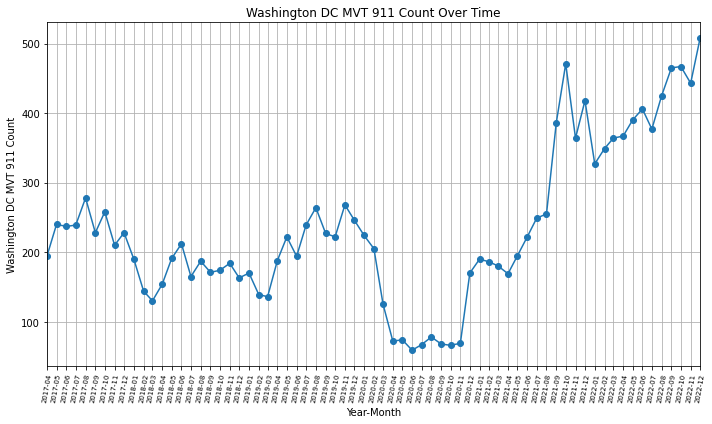

Percentage of duplicated calls:  0.0 
 Total Raw Call Counts:  16143 
 Total Duplicated Call Counts:  0


In [31]:
washionton_dc_911, washionton_dc_911_percentage_of_duplicated, washionton_dc_911_raw_calls_number, washionton_dc_911_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Montgomery_County_Police_cfs.csv",
    "Washington DC", "Start Time", "Start Time", ["%m/%d/%Y %I:%M:%S %p"], 
    "Close Type", "AUTO THEFT|STLVEHT|THEFT/LARCENY FROM AUTO", ["Incident_ID", "End Time"], False)

filtered values to represent MVT:  ['411' '411E' '411B' '411A' '411D' '411Z' '411U' '411AU' '411S']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Index(['OBJECTID', 'Incident Number', 'Incident Type Code', 'Classification',
       'Incident Type Description', 'Disposition', 'Incident date', 'Hour',
       'Month', 'Weekday', 'Year', 'Day of Year', 'Quarter of Year',
       'Location', 'Latitude', 'Longitude', 'Zipcode', 'x', 'y'],
      dtype='object')
['Incident Type Code', 'Classification', 'Incident Type Description', 'Disposition', 'Hour', 'Month', 'Weekday', 'Year', 'Day of Year', 'Quarter of Year', 'Location', 'Latitude', 'Longitude', 'Zipcode', 'x', 'y', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
['411' '411E' '411Z' '411D']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\347843945.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  grouped_df = df.groupby(date_column).size().reset_index()


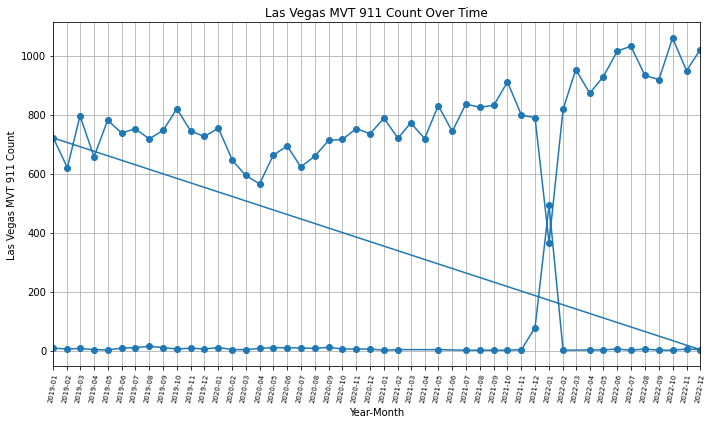

Percentage of duplicated calls:  2.1212121212121215 
 Total Raw Call Counts:  65670 
 Total Duplicated Call Counts:  1393


In [32]:
las_vegas_911, las_vegas_percentage_of_duplicated, las_vegas_raw_calls_number, las_vegas_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\LV_cfs.csv",
    "Las Vegas", "Incident date",  "Incident date", ["%m/%d/%Y %I:%M:%S %p"], "Incident Type Code", "411", 
    ['OBJECTID', 'Incident Number'], False, value_to_exclude= "411AU|411A|411B")

filtered values to represent MVT:  ['AUTO X REPORT']
Index(['X', 'Y', 'incident_id', 'agency', 'incident_address', 'zip_code',
       'priority', 'callcode', 'calldescription', 'category', 'call_timestamp',
       'precinct_sca', 'respondingunit', 'officerinitiated', 'intaketime',
       'dispatchtime', 'traveltime', 'totalresponsetime', 'time_on_scene',
       'totaltime', 'neighborhood', 'block_id', 'council_district',
       'longitude', 'latitude', 'shape', 'ObjectId'],
      dtype='object')
['X', 'Y', 'agency', 'incident_address', 'zip_code', 'priority', 'callcode', 'calldescription', 'category', 'precinct_sca', 'respondingunit', 'officerinitiated', 'neighborhood', 'block_id', 'council_district', 'longitude', 'latitude', 'shape', 'ObjectId', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['AUTO X REPORT']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')


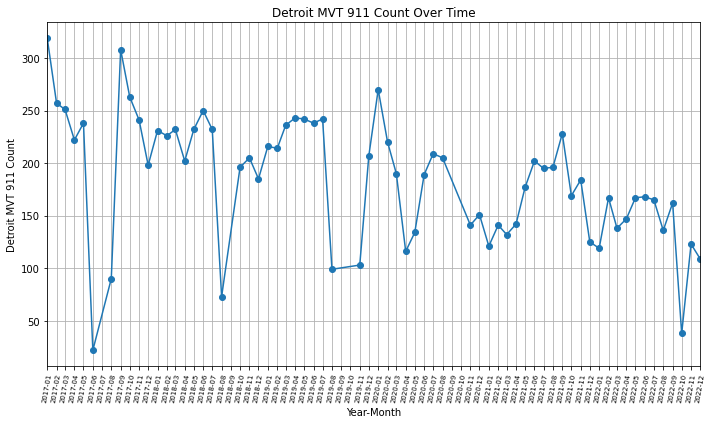

Percentage of duplicated calls:  0.0 
 Total Raw Call Counts:  12189 
 Total Duplicated Call Counts:  0


In [33]:
detroit_911, detroit_percentage_of_duplicated, detroit_raw_calls_number, detroit_duplicated_calls  = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Detroit_cfs.csv", 
    "Detroit", "call_timestamp",  "call_timestamp", ["%Y/%m/%d %H:%M:%S"], "calldescription", 
    "AUTO X REPORT", ['incident_id', 'intaketime', 'dispatchtime', 
                      'traveltime', 'totalresponsetime', 'time_on_scene','totaltime'], 
    False)

filtered values to represent MVT:  ['AUTO THEFT REPORT' 'AUTO THEFT J/O' 'AUTO THEFT IN PROGRE']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')


Index(['ADDRESS_X', 'AGENCY', 'CREATE_TIME_INCIDENT', 'DISPOSITION_TEXT',
       'EVENT_NUMBER', 'INCIDENT_TYPE_ID', 'INCIDENT_TYPE_DESC', 'PRIORITY',
       'PRIORITY_COLOR', 'ARRIVAL_TIME_PRIMARY_UNIT', 'CLOSED_TIME_INCIDENT',
       'DISPATCH_TIME_PRIMARY_UNIT', 'BEAT', 'DISTRICT', 'SNA_NEIGHBORHOOD',
       'CPD_NEIGHBORHOOD', 'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'LATITUDE_X',
       'LONGITUDE_X'],
      dtype='object')
['ADDRESS_X', 'AGENCY', 'DISPOSITION_TEXT', 'INCIDENT_TYPE_ID', 'INCIDENT_TYPE_DESC', 'PRIORITY', 'PRIORITY_COLOR', 'BEAT', 'DISTRICT', 'SNA_NEIGHBORHOOD', 'CPD_NEIGHBORHOOD', 'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'LATITUDE_X', 'LONGITUDE_X', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['AUTO THEFT IN PROGRE' 'AUTO THEFT REPORT' 'AUTO THEFT J/O']


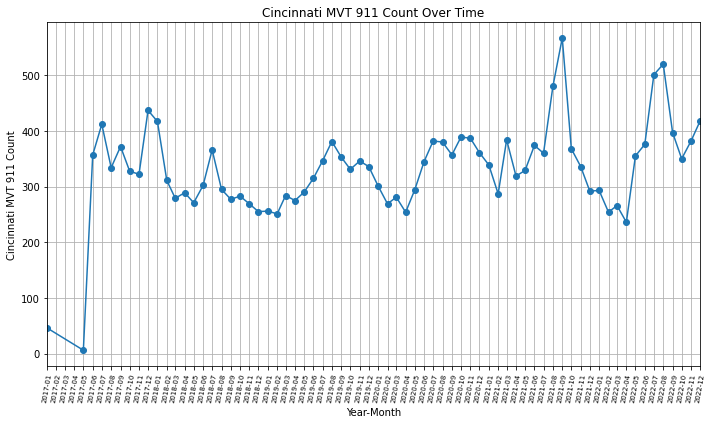

Percentage of duplicated calls:  0.0 
 Total Raw Call Counts:  22775 
 Total Duplicated Call Counts:  0


In [34]:
cincinnati_911, cincinnati_percentage_of_duplicated, cincinnati_raw_calls_number, cincinnati_duplicated_calls = do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Cincinnati_cfs.csv",
    "Cincinnati", "CREATE_TIME_INCIDENT", "CREATE_TIME_INCIDENT", ["%m/%d/%Y %I:%M:%S %p"], "INCIDENT_TYPE_DESC", 
    "AUTO THEFT REPORT|AUTO THEFT J/O|AUTO THEFT IN PROGRE", 
    ['EVENT_NUMBER', 'ARRIVAL_TIME_PRIMARY_UNIT', 'CLOSED_TIME_INCIDENT', 'DISPATCH_TIME_PRIMARY_UNIT'],
    False)

In [35]:
cincinnati_911.head()

,year_month,Cincinnati_MVT_911
0,2017-01-01,46
1,2017-05-01,6
2,2017-06-01,357
3,2017-07-01,412
4,2017-08-01,334


filtered values to represent MVT:  ['CARJACKING IN PROGRESS LARCENY OF MV              ']
Index(['Type', 'Group', 'FYgroup', 'PrimaryAgency', 'Address', 'Intersection',
       'Priority', 'DateTimeReceived', 'AlarmLevel', 'ReportingArea',
       'FireBox', 'PoliceSector', 'PoliceRoute', 'DateTimeClosed',
       'LadderDistrict', 'EngineDistrict', 'NeighborhoodID', 'Neighborhood',
       '1XXaddress'],
      dtype='object')
['Type', 'Group', 'FYgroup', 'PrimaryAgency', 'Address', 'Intersection', 'Priority', 'AlarmLevel', 'ReportingArea', 'FireBox', 'PoliceSector', 'PoliceRoute', 'LadderDistrict', 'EngineDistrict', 'NeighborhoodID', 'Neighborhood', '1XXaddress', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
No mvt value to exclude
['CARJACKING IN PROGRESS LARCENY OF MV              ']


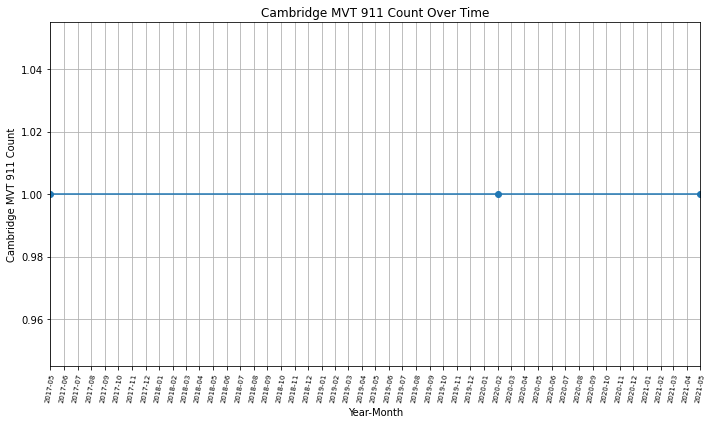

Percentage of duplicated calls:  0.0 
 Total Raw Call Counts:  3 
 Total Duplicated Call Counts:  0


In [36]:
cambridge_911, cambridge_percentage_of_duplicated, cambridge_raw_calls_number, cambridge_duplicated_calls =do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Cambridge_cfs.csv", 
    "Cambridge", "DateTimeReceived", "DateTimeReceived", ["%m/%d/%Y %I:%M:%S %p"], "Type",
    "CARJACKING IN PROGRESS LARCENY OF MV", ['DateTimeClosed'], False)

# Tried to see the result from Cambridge 911 records, but the result shows very few cases and there is no fluctuation over time. 

filtered values to represent MVT:  ['Auto Theft Service' 'Auto Theft Information' 'Auto Theft'
 'Auto Theft Recovery' 'Ooc Auto Theft' 'Ooc Auto Theft Recovery'
 'Att Auto Theft' 'Bait Auto Theft' 'Auto Theft Bait Vehicle']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df[time_column] = pd.to_datetime(duplicated_df[time_column])
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Index(['Incident Number', 'Incident Type', 'Council District',
       'Mental Health Flag', 'Priority Level', 'Response Datetime',
       'Response Day of Week', 'Response Hour', 'First Unit Arrived Datetime',
       'Call Closed Datetime', 'Sector', 'Initial Problem Description',
       'Initial Problem Category', 'Final Problem Description',
       'Final Problem Category', 'Number of Units Arrived',
       'Unit Time on Scene', 'Call Disposition Description',
       'Report Written Flag', 'Response Time', 'Officer Injured/Killed Count',
       'Subject Injured/Killed Count', 'Other Injured/Killed Count', 'Geo ID',
       'Census Block Group'],
      dtype='object')
['Incident Type', 'Council District', 'Mental Health Flag', 'Priority Level', 'Response Day of Week', 'Response Hour', 'Sector', 'Initial Problem Description', 'Initial Problem Category', 'Final Problem Description', 'Final Problem Category', 'Number of Units Arrived', 'Call Disposition Description', 'Report Written Flag'

C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\1268171958.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['unique_case_filtered_after_duplication'] = duplicated_df.duplicated(subset=subset_column_list, keep='first')
C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\347843945.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  grouped_df = df.groupby(date_column).size().reset_index()


['Auto Theft Service' 'Ooc Auto Theft' 'Auto Theft']


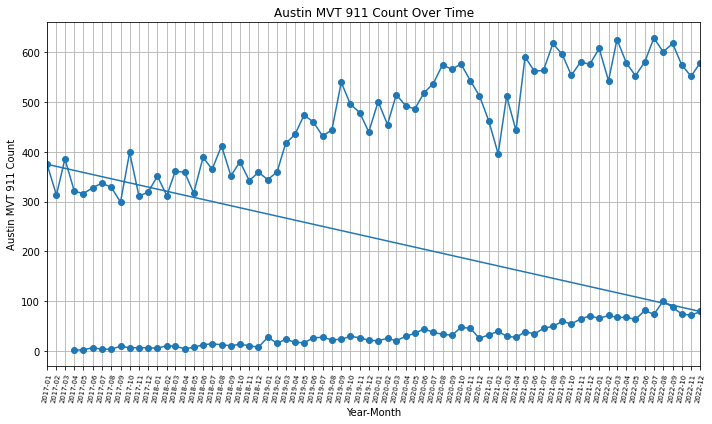

Percentage of duplicated calls:  4.496788008565311 
 Total Raw Call Counts:  46233 
 Total Duplicated Call Counts:  2079


In [37]:
austin_911, austin_percentage_of_duplicated, austin_raw_calls_number, austin_duplicated_calls =do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\APD_Computer_Aided_Dispatch_Incidents_20240531.csv", 
    "Austin", "Response Datetime", "Response Datetime", ["%m/%d/%Y %I:%M:%S %p"], "Final Problem Description", 
    "Auto Theft Service|Auto Theft|Ooc Auto Theft", 
    ['Incident Number', 'First Unit Arrived Datetime', 'Call Closed Datetime', 'Unit Time on Scene',
    'Response Time'],  False, value_to_exclude= "Information|Recovery|Att|Parts|Bait")
# unknown reasons shown that some data has processed in different format of dates, will added these cases up
# in the upcoming process for austin 911 cases.
# Tried to see the result from Cambridge 911 records, but the result shows very few cases and there is no fluctuation over time. 

filtered values to represent MVT:  ['AUTO THEFT' 'ATTPT AUTO THEFT' 'AUTO THEFTPOSS' 'AUTO THEFT ATTEM'
 'ATTMP AUTO THEFT' 'POSS AUTO THEFT' 'ATTEMPAUTO THEFT'
 'AUTO THEFT/RECOV' 'AUTO THEFT POSSI' 'AUTO THEFT-ATTEM'
 'ATTMPTAUTO THEFT' 'ATTMTAUTO THEFT' 'PSS AUTO THEFT']


C:\Users\tosea\AppData\Local\Temp\ipykernel_50908\2123274795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[date_column] = filtered_df[date_column].dt.strftime('%Y-%m')


Index(['ï»¿recordId', 'callKey', 'callDateTime', 'priority', 'district',
       'description', 'callNumber', 'incidentLocation', 'location',
       'Neighborhood', 'PoliceDistrict', 'PolicePost', 'CouncilDistrict',
       'SheriffDistricts', 'Community_Statistical_Areas', 'Census_Tracts',
       'VRIZones', 'ZIPCode'],
      dtype='object')
['ï»¿recordId', 'priority', 'district', 'description', 'callNumber', 'incidentLocation', 'location', 'Neighborhood', 'PoliceDistrict', 'PolicePost', 'CouncilDistrict', 'SheriffDistricts', 'Community_Statistical_Areas', 'Census_Tracts', 'VRIZones', 'ZIPCode', 'potential_duplicate', 'duplicated_and_less_than_xx_minutes']
['AUTO THEFT' 'POSS AUTO THEFT' 'ATTEMPAUTO THEFT' 'ATTMP AUTO THEFT'
 'AUTO THEFT ATTEM' 'AUTO THEFTPOSS' 'ATTPT AUTO THEFT' 'AUTO THEFT POSSI'
 'AUTO THEFT/RECOV' 'AUTO THEFT-ATTEM' 'ATTMPTAUTO THEFT' 'PSS AUTO THEFT']


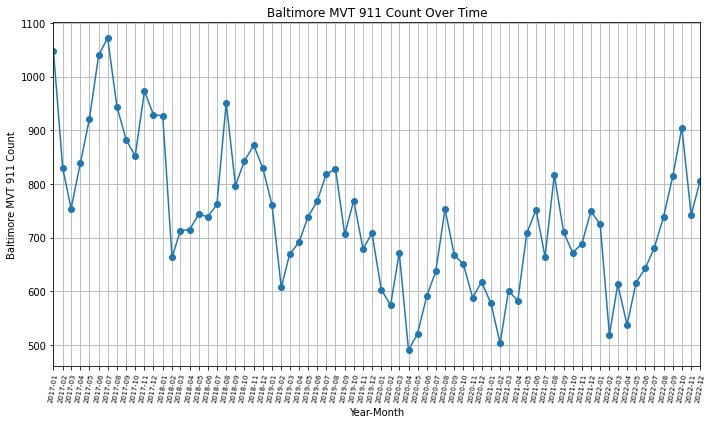

Percentage of duplicated calls:  0.0 
 Total Raw Call Counts:  53110 
 Total Duplicated Call Counts:  0


In [38]:
baltimore_911, baltimore_percentage_of_duplicated, baltimore_raw_calls_number, baltimore_duplicated_calls =do_it_all_at_once(
    r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\Baltimore PD", 
    "Baltimore", "callDateTime", "callDateTime", ["%Y/%m/%d %H:%M:%S"], "description", 
    "AUTO THEFT", 
    ['recordId', 'callKey'], True, value_to_exclude= "ATTMT")

# Tried to see the result from Cambridge 911 records, but the result shows very few cases and there is no fluctuation over time. 

In [65]:
testsfpd = pd.read_csv(r"D:\Google Drive\0JJPHD\0 Dissertation Proposal\Data_Dissertation\city_level_911_dispatch_data\SFPD_cfs.csv")

In [68]:
testsfpd.iloc[:,15:].tail(50)

,priority_original,priority_final,agency,disposition,onview_flag,sensitive_call,intersection_name,intersection_id,intersection_point,supervisor_district,...,police_district,data_as_of,data_updated_at,data_loaded_at,source_filename,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
5567286,3,A,Police,REP,N,False,19TH ST \ SANCHEZ ST,25718000.0,POINT (-122.43042 37.759556),8.0,...,MISSION,07/23/2023 01:30:01 AM,07/23/2023 02:30:33 AM,01/09/2024 02:32:52 AM,closecall2023-07-23_01-30-01,52.0,52.0,3.0,5.0,5.0
5567287,C,C,Police,NaN,Y,False,VAN NESS AVE \ ALICE B TOKLAS PL,25195000.0,POINT (-122.42122 37.785233),5.0,...,NORTHERN,08/19/2021 01:24:51 PM,02/23/2022 05:13:50 PM,01/09/2024 02:32:52 AM,closecall2021-08-19_13-24-43,20.0,20.0,4.0,11.0,36.0
5567288,A,A,Police,ABA,N,False,SUNNYDALE AVE \ SANTOS ST,20433000.0,POINT (-122.41828 37.71235),10.0,...,INGLESIDE,08/19/2021 07:29:29 AM,02/23/2022 05:13:50 PM,01/09/2024 02:32:52 AM,closecall2021-08-19_07-29-27,74.0,74.0,9.0,9.0,40.0
5567289,C,C,Police,REP,N,False,VISITACION AVE \ SCHWERIN ST,20372000.0,POINT (-122.410645 37.712208),10.0,...,INGLESIDE,12/31/2022 01:30:02 AM,12/31/2022 02:30:27 AM,01/09/2024 02:32:52 AM,closecall2022-12-31_01-30-02,75.0,75.0,9.0,9.0,40.0
5567290,B,B,Police,HAN,N,False,ELM ST \ GOUGH ST,25943000.0,POINT (-122.42383 37.78108),5.0,...,NORTHERN,08/23/2021 12:04:40 PM,02/23/2022 05:13:50 PM,01/09/2024 02:32:52 AM,closecall2021-08-23_12-04-39,100.0,100.0,4.0,11.0,39.0
5567291,B,B,Police,GOA,N,False,ELLIS ST \ VAN NESS AVE,25190000.0,POINT (-122.421005 37.783825),5.0,...,NORTHERN,08/19/2021 10:59:13 AM,02/23/2022 05:13:50 PM,01/09/2024 02:32:52 AM,closecall2021-08-19_10-59-11,20.0,20.0,4.0,10.0,36.0
5567292,C,C,Municipal Transportation Agency,HAN,N,False,GEARY BLVD \ 36TH AVE,27890000.0,POINT (-122.49652 37.779552),1.0,...,RICHMOND,08/23/2021 09:53:03 AM,02/23/2022 05:13:50 PM,01/09/2024 02:32:52 AM,closecall2021-08-23_09-53-03,8.0,8.0,8.0,4.0,29.0
5567293,C,C,Police,HAN,Y,False,AVENUE B \ CALIFORNIA AVE,34024000.0,POINT (-122.37125 37.817825),6.0,...,SOUTHERN,08/19/2021 10:59:13 AM,02/23/2022 05:13:50 PM,01/09/2024 02:32:52 AM,closecall2021-08-19_10-59-11,36.0,36.0,1.0,10.0,37.0
5567294,A,A,Police,NOM,N,False,TAYLOR ST \ SACRAMENTO ST,25093000.0,POINT (-122.41265 37.792553),3.0,...,CENTRAL,05/04/2022 02:10:04 AM,05/04/2022 02:30:27 AM,01/09/2024 02:32:52 AM,closecall2022-05-04_02-10-02,16.0,16.0,6.0,3.0,21.0
5567295,B,B,Police,NCR,N,False,AMBER DR \ TURQUOISE WAY,22312000.0,POINT (-122.44263 37.744347),8.0,...,INGLESIDE,08/23/2021 09:53:03 AM,02/23/2022 05:13:50 PM,01/09/2024 02:32:52 AM,closecall2021-08-23_09-53-03,57.0,57.0,9.0,5.0,22.0
